#  PCA 主成分分析法

对于一组特征$ (x_1,x_2,...x_n) $,求出特征中的最主要特征，也就是主成分分析
主要采用搜索测量进行主成分分析法求解。  
目标就是：  
求w，使得$ Var(X_n) = \frac{1}{m}\sum_{i=1}^{m}(X .*w)^2 $
 

主成分分析和线性回归不同：
- 主成分分析中，坐标轴为两个特征；线性回归中，横轴特征，纵轴为分类
- 主成分分析所求为坐标点到直线向量w的映射，因此表示出来为垂直于直线w； 线性回归为求MSE最小，因此并不垂直于直线w，而是平行于分类轴。


主成分分析法中第一步为demean，而不时常用的归一化

PCA 就是将高维数据向低维数据进行映射的方法
使用PCA找到前k个主成分k*n，从而将原来的m*n的数据（n个特征）映射到m*k的数据（矩阵乘法），将原来高维n数据映射到低维k数据；
上述过程的反过程基本上成立，从而可以产生一个数据压缩算法，也就是我们可以将大量的数据m*n,寻找一个k*n，映射为一个m*k，减少数据传输，到了接收端，在利用已知的k*n和m*k，恢复原始数据m*n（和原始数据不同，会存在误差，因为上述映射等同于信息损失的压缩过程，其实只能恢复k维中存在的信息，但是采用的是n维的表现形式）

# sklearn中的PCA


In [1]:
from pylab import *

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3.0 + np.random.normal(0,10.,size=100)

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca.components_

array([[-0.78928743, -0.6140239 ]])

In [6]:
x_reduction = pca.transform(X)

In [7]:
x_reduction.shape

(100, 1)

In [8]:
xx = pca.inverse_transform(x_reduction)

In [9]:
xx.shape

(100, 2)

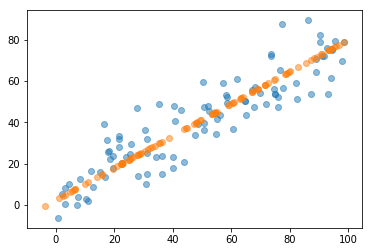

In [10]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(xx[:,0], xx[:,1], alpha=0.5)
plt.show()

In [11]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
%%time

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

Wall time: 5 ms


In [15]:
knn_clf.score(x_test, y_test)

0.9866666666666667

# 利用PCA提高速度

In [16]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [17]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

Wall time: 1 ms


In [18]:
knn_clf.score(x_test_reduction, y_test)

0.6066666666666667

### 需要找到合适的降维维度，PCA提供了解释方差比例来提供判断
pca.explained_variance_ratio_

In [19]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [20]:
# 先用全特征，输出维度的重要性
pca = PCA(n_components=64) 
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [21]:
# 给出了维度重要性，近似0的可以丢掉
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

绘制维度重要性曲线

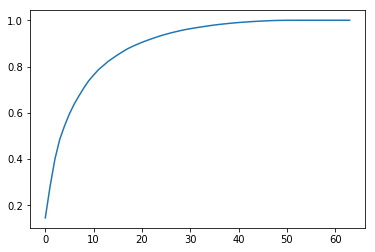

In [22]:
plt.plot([i for i in range(x_train.shape[1])], [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [23]:
# 上述重要性曲线功能封装在sklearn的PCA中，也就是不要传入n_component,而是传入重要性程度，自动计算n_components;但是2维有一个特殊的好处，
# 可以可视化
pca = PCA(0.95) 
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

In [24]:
pca.n_components_

28

In [25]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)

Wall time: 3 ms


In [26]:
knn_clf.score(x_test_reduction,y_test)

0.98

#   PCA处理MNIST

In [27]:
from sklearn.datasets import fetch_mldata

In [28]:
mnist = fetch_mldata('MNIST original')

In [29]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [30]:
X,y = mnist['data'],mnist['target']

In [31]:
X.shape

(70000, 784)

In [32]:
x_train = np.array(X[:60000],dtype=float)
y_train = np.array(y[:60000],dtype=float)
x_test = np.array(X[60000:],dtype=float)
y_test = np.array(y[60000:],dtype=float)


In [33]:
# too slow to run
#knn_clf = KNeighborsClassifier()
#knn_clf.fit(x_train, y_train)
#knn_clf.score(x_test, y_test)
# 0.968...

### 使用pca降维

In [34]:
pca = PCA(0.9)
pca.fit(x_train)
x_train_reduction  = pca.transform(x_train)

In [35]:
x_train_reduction.shape

(60000, 87)

In [36]:
x_test_reduction = pca.transform(x_test)

In [37]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(x_train_reduction, y_train)

Wall time: 716 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
%time knn_clf.score(x_test_reduction, y_test)

Wall time: 1min 26s


0.9728

### PCA可以对数据降噪

### PCA生成特征脸，专用于人脸识别领域

In [41]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()

In [42]:
faces.keys()


dict_keys(['target_names', 'images', 'target', 'DESCR', 'data'])

In [44]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [45]:
faces.images.shape

(13233, 62, 47)

In [47]:
random_indexes = np.random.permutation(len(faces.data))
X= faces.data[random_indexes]

In [54]:
example_faces = X[:36,:]
example_faces.shape


(36, 2914)

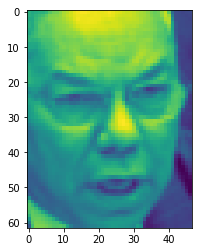

In [55]:
plt.imshow(example_faces[0].reshape(62,47))
plt.show()

In [49]:
# 特正脸
from sklearn.decomposition import PCA
pca = PCA(svd_solver = "randomized")

In [50]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [58]:
pca.components_.shape

(2914, 2914)

In [59]:
pca.components_[0]

array([-0.01000242, -0.01076615, -0.01174599, ..., -0.00561103,
       -0.00422508, -0.00295336], dtype=float32)

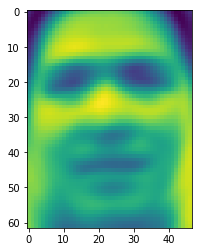

In [65]:
plt.imshow(pca.components_[6:7].reshape(62,47))
plt.show()